# Assignment 4 - Part 2

### Due Date: Friday, April 10th, 2020 @ 11pm



For this assignment you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 4 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

### Github & D2L Submissions
Please create a **private** github repo and submit your answers on both **private github** and on **D2L**. Please add me as collaborator to your github account: `nasimtaba`.

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

 Start by reading in the titanic.csv file into a pandas dataframe.

In [4]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Hypothesis 1

In [6]:
hypo1 = titanic[['Survived', 'Pclass']]
hypo1.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [52]:
hypo1.count()

Survived    891
Pclass      891
dtype: int64

In [4]:
#the number of survived people by Pclass
hypo1_survivalnum=hypo1.groupby('Pclass').sum()
hypo1_survivalnum

,Survived
Pclass,
1,136
2,87
3,119


In [5]:
#the number of entire people by Pclass
hypo1_entirenum=hypo1.groupby('Pclass').count()
hypo1_entirenum

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
SurvivalRate = hypo1_survivalnum/hypo1_entirenum
SurvivalRate.reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Rate by Class')

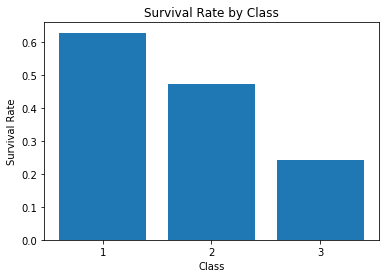

In [23]:
plt.bar(x='Pclass', height='Survived', data=SurvivalRate.reset_index())
plt.xticks(SurvivalRate.reset_index()['Pclass'])
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')

## Hypothesis 2

In [25]:
hypo2 = titanic[['Survived', 'Sex']]
hypo2.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [51]:
hypo2.count()

Survived    891
Sex         891
dtype: int64

In [38]:
hypo2.groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


In [39]:
hypo2.groupby('Sex').count()

,Survived
Sex,
female,314
male,577


In [41]:
SurvivalRate2 = hypo2.groupby('Sex').sum() / hypo2.groupby('Sex').count()
SurvivalRate2.reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Rate by Sex')

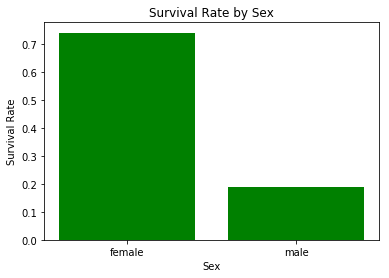

In [44]:
plt.bar(x='Sex', height='Survived', data=SurvivalRate2.reset_index(), color='green')
plt.xticks(SurvivalRate2.reset_index()['Sex'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

## Hypothesis 3

#### method1: categorizing 'Age'

In [6]:
hypo3 = titanic[['Age', 'Survived']]
hypo3.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [31]:
import math

In [32]:
def age_categorize(age) : 
    if math.isnan(age) :
        return 'NaN'
    return math.floor (age/10)*10

In [33]:
hypo3['NewAge'] = hypo3['Age'].apply(age_categorize)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
hypo3

,Age,Survived,NewAge
0,22.0,0,20
1,38.0,1,30
2,26.0,1,20
3,35.0,1,30
4,35.0,0,30
5,NaN,0,NaN
6,54.0,0,50
7,2.0,0,0
8,27.0,1,20
9,14.0,1,10


In [35]:
hypo3.dropna(inplace=True)
hypo3.count()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Age         714
Survived    714
NewAge      714
dtype: int64

In [43]:
#the number of survival
hypo3.groupby('NewAge').sum()['Survived']

NewAge
0     38
10    41
20    77
30    73
40    34
50    20
60     6
70     0
80     1
Name: Survived, dtype: int64

In [44]:
#total number of passengers
hypo3.groupby('NewAge').count()['Survived']

NewAge
0      62
10    102
20    220
30    167
40     89
50     48
60     19
70      6
80      1
Name: Survived, dtype: int64

In [47]:
hypo33= hypo3.groupby('NewAge').sum()['Survived'] / hypo3.groupby('NewAge').count()['Survived']
hypo33.reset_index()

,NewAge,Survived
0,0,0.612903
1,10,0.401961
2,20,0.350000
3,30,0.437126
4,40,0.382022
5,50,0.416667
6,60,0.315789
7,70,0.000000
8,80,1.000000


<Figure size 1440x720 with 0 Axes>

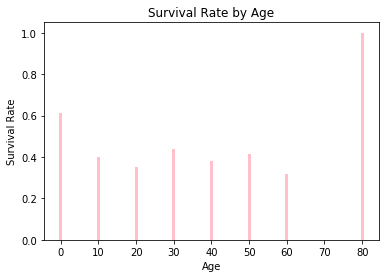

<Figure size 1440x720 with 0 Axes>

In [46]:
plt.bar(x='NewAge', height='Survived', data=hypo33.reset_index(), color='pink')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.figure(figsize=(20, 10))

#### method2: Using 'Age' as a numerical variable

In [19]:
hypo3.dropna(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
hypo3.groupby('Age').sum().head(10)

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
1.00,5
2.00,3
3.00,5
4.00,7


In [22]:
hypo3.groupby('Age').count().head(10)

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
1.00,7
2.00,10
3.00,6
4.00,10


In [35]:
a = hypo3.groupby('Age').sum()
b = hypo3.groupby('Age').count()
a['total'] = b['Survived']
a['rate'] = a['Survived'] / b['Survived']
a.head(10)

,Survived,total,rate
Age,,,
0.42,1,1,1.000000
0.67,1,1,1.000000
0.75,2,2,1.000000
0.83,2,2,1.000000
0.92,1,1,1.000000
1.00,5,7,0.714286
2.00,3,10,0.300000
3.00,5,6,0.833333
4.00,7,10,0.700000


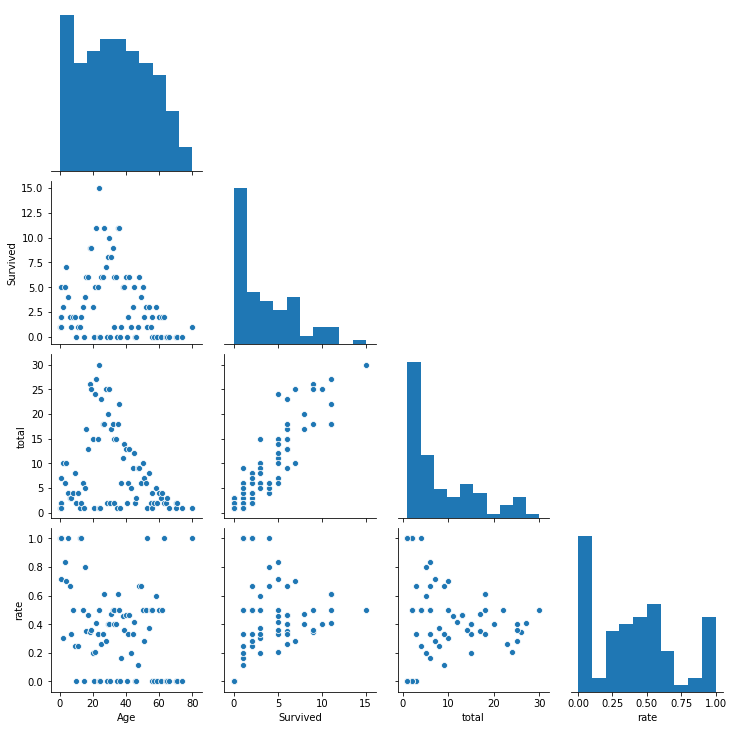

In [43]:
A = a.reset_index()
sns.pairplot(A, corner=True)

In [44]:
A.corr()

,Age,Survived,total,rate
Age,1.000000,-0.248333,-0.198554,-0.367963
Survived,-0.248333,1.000000,0.906307,0.301918
total,-0.198554,0.906307,1.000000,0.042893
rate,-0.367963,0.301918,0.042893,1.000000
